In [68]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
def periodic_cond(pos,dim,N,bound):
    
    for x in range(N):        
        for y in range(3):
            if bound[y] == 1:
                if pos.iloc[x,y] > dim[y]:
                    pos.iloc[x,y] = -(dim[y]) + pos.iloc[x,y]
                elif pos.iloc[x,y] < 0:
                    pos.iloc[x,y] = (dim[y]) + pos.iloc[x,y]
                else:
                    pos.iloc[x,y] = pos.iloc[x,y]
            else:
                pos.iloc[x,y] = pos.iloc[x,y]
    return pos

In [71]:
def cutoff():
    U    = []
    X_np = np.arange(0.001, 10, 0.001)
    X    = list(X_np)
    F    = []
    for x in X:
        dist2   = x*x
        dist6   = dist2**3
        dist12  = dist6**2
        dist13  = dist12*x
        dist7   = dist6*x
    
        u  = 4*lj_e*(lj_s12/dist12 - lj_s6/dist6)                            # Potential energy calculation
        f  = 4*lj_e*(((12 * lj_s12) / dist13) - ((6 * lj_s6) / dist7))       # Force calculation 
        
        U.append(u)
        F.append(f)
        
    min_index = U.index(min(U))
    print("Minima of interatomic potential with He-He:", U[min_index])
    print("Equilibrium interatomic distance of He-He:", X[min_index])
    
    PC = pd.DataFrame(list(zip(X,U,F)),
                      columns =['Int_dist','E_Pot','Force'])
    coords = PC.to_numpy()
    np.savetxt('LJ_Curve.out', coords)
    
    fig, ax = plt.subplots()
    ax.plot(X[min_index - 800 : min_index + 500] , U[min_index - 800 : min_index + 500],label = "E_pot")
    ax.plot(X[min_index - 800 : min_index + 500] , F[min_index - 800 : min_index + 500],label = "Force")


    ax.set(xlabel='Interatomic_Distance(r)', ylabel='Force(F) & E_pot(U)',
           title='Lennard-jones potential curve')
    ax.legend()
    
    fig.savefig("test.png")
    plt.show()
    
    return X[min_index]

In [44]:
def Skin(pos,N,cutoff):
    r = cutoff + 4.0
    neigh = []
    for x in range(N):
        nh = []
        for y in range(x+1,N):
            if pos.iloc[x,0]-pos.iloc[y,0]<=r and pos.iloc[x,1]-pos.iloc[y,1]<=r and pos.iloc[x,2]-pos.iloc[y,2]<=r:
                nh.append(y)
        for y in range(x-1,0,-1):
            if pos.iloc[x,0]-pos.iloc[y,0]<=r and pos.iloc[x,1]-pos.iloc[y,1]<=r and pos.iloc[x,2]-pos.iloc[y,2]<=r:
                nh.append(y)
        neigh.append(nh)
    return neigh

In [45]:
def Neighbours(pos,skin,N,cutoff):
    r = cutoff + 2.0
    neighh = []
    for x in range(N):
        nhh = []
        for y in range(len(skin[x])):
            if pos.iloc[x,0]-pos.iloc[skin[x][y],0]<=r and pos.iloc[x,1]-pos.iloc[skin[x][y],1]<=r and pos.iloc[x,2]-pos.iloc[skin[x][y],2]<=r:
                nhh.append(skin[x][y])
        neighh.append(nhh)
    return neighh

In [46]:
def lennard_jones(pos,neigh,N):
    distt2 = []
    for x in range(N):
        dist = []
        for y in range(len(neigh[x])):
            distt = pos.iloc[x,0]*pos.iloc[neigh[x][y],0] + pos.iloc[x,1]*pos.iloc[neigh[x][y],1]+pos.iloc[x,2]*pos.iloc[neigh[x][y],2]
            #distt = distt**2
            #distt = math.sqrt(distt)
            dist.append(distt)
        distt2.append(dist)    
#    print(distt2)
    U = []
    F = []
    for i in range(N):
        UU = []
        FF = []
        for j in range(len(distt2[i])): 
            dist6   = distt2[i][j]**3
            dist12  = dist6**2
            #dist13  = dist12*math.sqrt(distt2[i][j])
            #dist7   = dist6*math.sqrt(distt2[i][j])
    
            u  = 4*lj_e*(lj_s12/dist12 - lj_s6/dist6)                            # Potential energy calculation
            #f  = 4*lj_e*(((12 * lj_s12) / dist13) - ((6 * lj_s6) / dist7))       # Force calculation
            
            UU.append(u)
            #FF.append(f)
        if len(UU) > 0:    
            U_avg = sum(UU)/len(UU)
            #F_avg = sum(FF)/len(FF)
            UU    = []
            #FF    = []
            UU.append(U_avg)
            #FF.append(F_avg)
        
        else:
            z  = 0
            UU = []
            UU.append(z)
            
        U.append(UU)
        #F.append(FF)
        
    return (U)

In [66]:
#Parameters are provided for Helium(He) atom.

box         = (50.0,5.0,5.0)   # Dimensions             [In Angstrom]
bound       = (1,1,1)
N_atom      = 1                  # No of atoms
N_step      = 50                 # No of Steps
N_write     = 1                 # Steps at which co-ordinate to be saved
Delta       = 10.0               # Time steps             [In ferrosecond]

temp        = 200.0              # Temperature            [In Kelvin]

lj_s        = 2.5238            # Lennard_jones_sigma    [In Angstrom]
lj_e        = 0.01962           # Lennard_jones_epsilon  [In Kcal/mol]
mass        = 4.002602          # Mass of atom           [In amu] 
bltz_const  = 0.001987191       # Boltzmann constant     [In Kcal/mol/K]

tf          = 1**(-15)           # Time factor            [Convert second to ferrosecond]
kT          = temp * bltz_const

In [48]:
#Pre-defined factors

dt          = Delta/tf
dt2         = dt * dt

v0          = math.sqrt(bltz_const * temp/mass)

lj_s6       = lj_s**6
lj_s12      = lj_s**12

In [49]:
def U_pot(x,s,e):
    x6     = x**6
    x12    = x**12
    s6     = s**6
    s12    = s**12
    u      = 4*e*(s12/x12 - s6/x6)
    return u

d_max value the sample crystal is considered to be: 10 A
Acceptance rate of the considered d_max: 46.81 %
d_max is predicted with the nearest value to the cutoff: 50 %


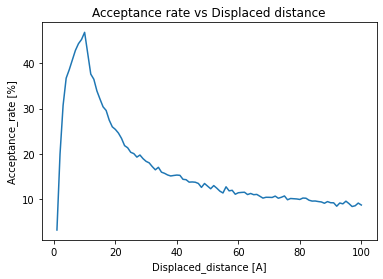

In [50]:
acc   = []
dist  = []
d     = 2.8329999999999997
d_max = 1
U     = U_pot(d,lj_s,lj_e)

while (d_max < 101):
    per = 0
    rand = random.random()
    for i in range(10000):
        dx  = (random.random() - 0.5) * d_max
        dx += d
        U_x = U_pot(dx,lj_s,lj_e)
        dU  = U_x - U
        if dU < 0:
            per += 1
        elif dU >= 0:
            p_acc = dU/(kT)
            if p_acc > math.sqrt(math.log(random.random())**2):
                per += 1
    per /= 100
    #print("Displaced_distance:",d_max,"  Acceptance_rate:",per,"%")
    acc.append(per)
    dist.append(d_max)
    d_max += 1

loc     = acc.index(max(acc))
d_max   = dist[loc]
print("d_max value the sample crystal is considered to be:",dist[loc],"A")
print("Acceptance rate of the considered d_max:",acc[loc],"%")
print("d_max is predicted with the nearest value to the cutoff:","50","%")
fig, ax = plt.subplots()
ax.plot(dist,acc)
plt.xlabel("Displaced_distance [A]")
plt.ylabel("Acceptance_rate [%]")
plt.title("Acceptance rate vs Displaced distance")
plt.show()

In [62]:
x_coords = []
y_coords = []
z_coords = []

for c in range(N_atom):
    x = random.random()
    y = random.random() 
    z = random.random() 
    pos = [x,y,z]
    
    for i in range(3):
        if pos[i] > (box[i]/100):
            pos[i] -= (box[i]/100)
            
        else:
            pos[i] = pos[i]
        pos[i] = round(pos[i] * (10**5)) / 1000
        
    x_coords.append(pos[0])
    y_coords.append(pos[1])
    z_coords.append(pos[2])
    
df = pd.DataFrame(list(zip(x_coords,y_coords,z_coords)),
                  columns =['x_coords','y_coords','z_coords'])
coords = df.to_numpy()
np.savetxt('Initial_conf.out', coords)
#dff = df.copy()

Minima of interatomic potential with He-He: -0.019619998506585003
Equilibrium interatomic distance of He-He: 2.8329999999999997


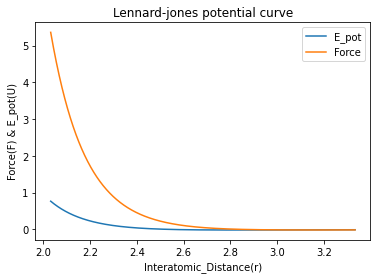

In [72]:
co = cutoff()

In [67]:
for tt in range(N_step + 1):
    
    dff = df
    for i in range(N_atom):
        for j in range(3):
            dx  = (random.random() - 0.5) * d_max
            df.iloc[i,j] += dx
    
    if tt%10 == 0:
        sk = Skin(df,N_atom,co)
    
    neig   = Neighbours(df,sk,N_atom,co)
    
    if tt%10 == 0:
        skk  = Skin(dff,N_atom,co)
    
    neigh    = Neighbours(dff,skk,N_atom,co)
    
    U_x = lennard_jones(df,neig,N_atom)
    U   = lennard_jones(dff,neigh,N_atom)
    
    for i in range(N_atom):
        dU = U_x[i][0] - U[i][0]
        for j in range(3):
            if dU >= 0:
                p_acc = dU/kT
                if p_acc < math.sqrt(math.log(random.random())**2):
                    df.iloc[i,j] = dff.iloc[i,j]
    
    n_df = df
    periodic_cond(n_df,box,N_atom,bound)
    df = n_df
    
    if tt%N_write == 0:
        crds  = df.to_numpy()
        name  = str(tt) + '.out'
        np.savetxt(name, crds)        